# PYCON 2019 Pandas Best Practices

## 1. Intro to the Dataset
https://www.kaggle.com/rounakbanik/ted-talks


In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.1.1'

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
ted = pd.read_csv('ted.csv')

In [7]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [9]:
ted.shape

(2550, 17)

In [10]:
ted.dtypes # object can contain strings, lists, dictionaries

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [12]:
ted.isna().sum() # any missing values?

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## 2. Which talks provoke the most online discussion?
LESSONS: 
- consider limitations and biases of data (only have 1st level comments, bias-older talks prolly have more views/comments)
- make columns understandable views/comment rather than comment/views

In [13]:
ted.sort_values('comments',ascending=False).head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764


In [14]:
ted['comments_per_view'] = ted.comments / ted.views # for every view of this talk there are x comments

In [16]:
ted.sort_values('comments_per_view',ascending=False).head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360


In [22]:
ted['views_per_comment'] = ted.views / ted.comments # easier to understand
ted.sort_values('views_per_comment').head()


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,735.525682


## 3. Visualize the distribution of comments
LESSONS: 
- frequency distribution
- choose plots based on datatypes
- use pandas one-liners to iterate thru plots quickly
- try modifying the plot defaults
- creating plots involves decision making (have to cut/add, plots are summaries)

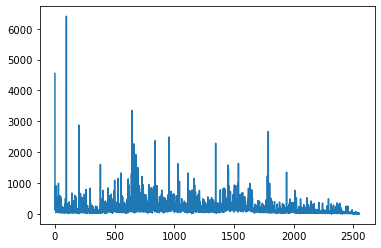

In [23]:
ted.comments.plot() # x is index, y is value of comments field
# line plot is for showing change over time, so not necessarily the right plot for this

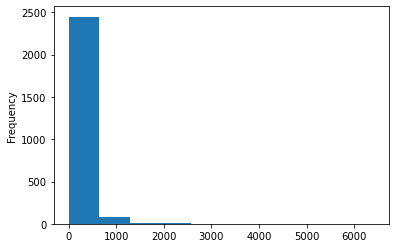

In [24]:
ted.comments.plot(kind='hist') # histogram divides into default 10 bins, frequency distribution
# lot more low comments

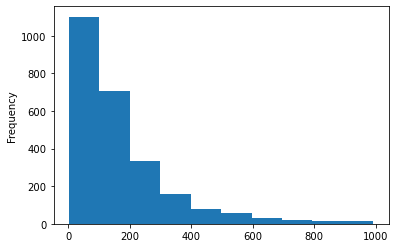

In [25]:
ted[ted.comments < 1000].comments.plot(kind='hist') # within the lower comments

In [26]:
ted[ted.comments >=1000].shape # only have 32 talks w over 1k comments

(32, 18)

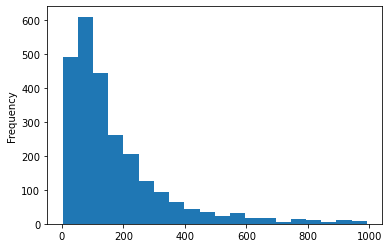

In [28]:
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist', bins=20)

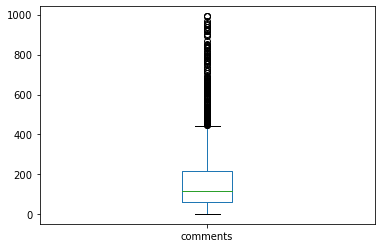

In [29]:
ted.loc[ted.comments < 1000, 'comments'].plot(kind='box') # black dots are outliers


## 4. Plot the number of talks that took place each year
LESSONS:
- convert date to date format, new col with year, group by year, count talks
- bar plots good for categorical data
- Read the documentation
- Use datetime data type for dates and tiems
- consider excluding data if it might not be relevant

In [30]:
ted.event # not all contain the year

0            TED2006
1            TED2006
2            TED2006
3            TED2006
4            TED2006
            ...     
2545         TED2017
2546         TED2017
2547         TED2017
2548    TEDxMileHigh
2549         TED2017
Name: event, Length: 2550, dtype: object

In [33]:
ted['film_datetime'] = pd.to_datetime(ted.film_date,unit='s')

In [34]:
ted[['event','film_datetime']].sample(5)

,event,film_datetime
905,TEDPrize@UN,2010-11-18
1413,TEDSalon London Fall 2012,2012-11-16
380,TED2009,2009-02-02
1292,TEDGlobal 2012,2012-06-27
361,Serious Play 2008,2008-05-05


In [35]:
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
views_per_comment            float64
film_datetime         datetime64[ns]
dtype: object

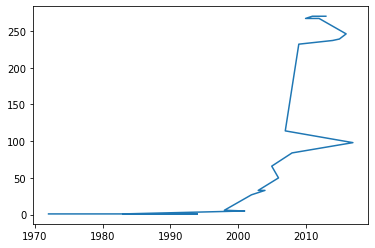

In [40]:
ted.film_datetime.dt.year.value_counts().plot() # sorting issue

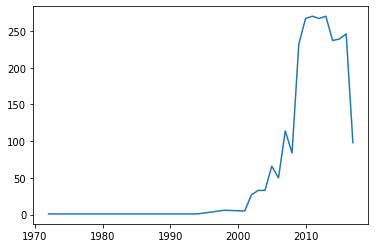

In [42]:
ted.film_datetime.dt.year.value_counts().sort_index().plot()

In [44]:
ted.film_datetime.min()

Timestamp('1972-05-14 00:00:00')

## 5. What were the "best" events in TED history to attend?
LESSONS:
- use apply any time it is necessary (but it's slow, so try to use built in fns)
- 

In [48]:
ted.groupby('event').views.agg(['count','mean']).sort_values('mean').tail()

,count,mean
event,,
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5
TEDxHouston,2,16140250.5
TEDxPuget Sound,1,34309432.0


In [53]:
ted.groupby('event').views.agg(['count','mean','sum']).sort_values('sum').tail() # what events had most total views

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


## 6. Unpack the ratings data
LESSONS:
- write your code in small chunks and build iteratively

In [54]:
ted.ratings.head() # dictionary


0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [55]:
ted.loc[0,'ratings']

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [58]:
type(ted.ratings[0]) #stringified list of dictionaries

str

In [59]:
import ast #abstract syntax tree

In [61]:
ast.literal_eval('[1,2,3]')

[1, 2, 3]

In [62]:
ast.literal_eval(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [63]:
def str_to_list(ratings_str):
    return ast.literal_eval(ratings_str)

In [64]:
str_to_list(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [65]:
ted.ratings.apply(str_to_list).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [66]:
ted.ratings.apply(lambda x: ast.literal_eval(x))

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings, Length: 2550, dtype: object

In [67]:
ted['ratings_list'] = ted.ratings.apply(lambda x: ast.literal_eval(x))

In [68]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_per_comment,film_datetime,ratings_list
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,10372.745443,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {..."
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,12077.433962,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,13195.903226,2006-02-24,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,8487.750000,2006-02-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}..."
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,20245.984823,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}..."


## 7. Count the total number of ratings recevied by each talk
- new column name 'num_ratings'

In [70]:
ted.ratings_list[0] # trying to sum the count

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [83]:
def get_num_ratings(list_of_dicts):
    num = 0
    for d in list_of_dicts:
        num = num + d['count']
    return num

In [84]:
get_num_ratings(ted.ratings_list[0])

93850

In [86]:
ted['num_ratings'] = ted.ratings_list.apply(get_num_ratings)

In [89]:
# ted.head()
ted.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

## 8. Which occupations deliver the funniest TED talks on average?
LESSONS:
- check assumptions about your data
- check whether results are reasonable
- take advantage of the fact that pandas operations often output a DataFrame or Series (and can do related operations)

### Step 1: Count the number of funny ratings

In [109]:
ted.ratings_list.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings_list, dtype: object

In [110]:
ted.ratings.str.contains('Funny').value_counts()

True    2550
Name: ratings, dtype: int64

In [119]:
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        print(d)
        # if d['name'] == 'Funny':
        #     return d['count']

In [120]:
# ted['funny_ratings'] = ted.ratings.apply(get_funny_ratings)
get_funny_ratings(ted.ratings_list[0])

{'id': 7, 'name': 'Funny', 'count': 19645}
{'id': 1, 'name': 'Beautiful', 'count': 4573}
{'id': 9, 'name': 'Ingenious', 'count': 6073}
{'id': 3, 'name': 'Courageous', 'count': 3253}
{'id': 11, 'name': 'Longwinded', 'count': 387}
{'id': 2, 'name': 'Confusing', 'count': 242}
{'id': 8, 'name': 'Informative', 'count': 7346}
{'id': 22, 'name': 'Fascinating', 'count': 10581}
{'id': 21, 'name': 'Unconvincing', 'count': 300}
{'id': 24, 'name': 'Persuasive', 'count': 10704}
{'id': 23, 'name': 'Jaw-dropping', 'count': 4439}
{'id': 25, 'name': 'OK', 'count': 1174}
{'id': 26, 'name': 'Obnoxious', 'count': 209}
{'id': 10, 'name': 'Inspiring', 'count': 24924}


In [118]:
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [121]:
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Funny':
            return d['count']

In [122]:
ted['funny_ratings'] = ted.ratings_list.apply(get_funny_ratings)

In [123]:
ted.funny_ratings.head()

0    19645
1      544
2      964
3       59
4     1390
Name: funny_ratings, dtype: int64

In [124]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,views_per_comment,film_datetime,ratings_list,num_ratings,funny_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,10372.745443,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",93850,19645
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,12077.433962,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2936,544
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,13195.903226,2006-02-24,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",2824,964
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,8487.750000,2006-02-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",3728,59
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,20245.984823,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",25620,1390


In [125]:
ted['funny_rate'] = ted.funny_ratings / ted.num_ratings

In [126]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,tags,title,url,views,views_per_comment,film_datetime,ratings_list,num_ratings,funny_ratings,funny_rate
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,10372.745443,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",93850,19645,0.209323
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,12077.433962,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2936,544,0.185286
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,13195.903226,2006-02-24,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",2824,964,0.341360
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,8487.750000,2006-02-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",3728,59,0.015826
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,20245.984823,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",25620,1390,0.054254


In [130]:
ted.sort_values('funny_rate').speaker_occupation.tail(20) # do the results make sense?

1849                       Science humorist
337                                Comedian
124     Performance poet, multimedia artist
315                                  Expert
1168             Social energy entrepreneur
1468                          Ornithologist
595                  Comedian, voice artist
1534                         Cartoon editor
97                                 Satirist
2297                          Actor, writer
568                                Comedian
675                          Data scientist
21                     Humorist, web artist
194                                Jugglers
2273                    Comedian and writer
2114                    Comedian and writer
173                                Investor
747                                Comedian
1398                               Comedian
685             Actor, comedian, playwright
Name: speaker_occupation, dtype: object

### Step 3: Analyze the funny rate by occupation

In [131]:
ted.groupby('speaker_occupation').funny_rate.mean().sort_values().tail()

speaker_occupation
Comedian                       0.512457
Actor, writer                  0.515152
Actor, comedian, playwright    0.558107
Jugglers                       0.566828
Comedian and writer            0.602085
Name: funny_rate, dtype: float64

In [133]:
ted.groupby('speaker_occupation').funny_rate.agg(['count','mean']).sort_values('mean').tail()

,count,mean
speaker_occupation,,
Comedian,6,0.512457
"Actor, writer",1,0.515152
"Actor, comedian, playwright",2,0.558107
Jugglers,1,0.566828
Comedian and writer,2,0.602085


In [135]:
ted.speaker_occupation.describe() # a lot of occupations with a unique (only one) count, small sample size

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

### Step 4: Focus on occupations that are well-represented in the data

In [139]:
occupation_counts = ted.speaker_occupation.value_counts() # type is a pandas Series

In [146]:
top_occupations = occupation_counts[occupation_counts >= 5].index # list of occupations that appear at least five times

In [148]:
ted_top_occupations = ted[ted.speaker_occupation.isin(top_occupations)]

In [149]:
ted_top_occupations.shape

(786, 23)

In [151]:
ted_top_occupations.groupby('speaker_occupation').funny_rate.mean().sort_values()

speaker_occupation
Surgeon                                       0.002465
Physician                                     0.004515
Photojournalist                               0.004908
Investor and advocate for moral leadership    0.005198
Photographer                                  0.007152
                                                ...   
Data scientist                                0.184076
Producer                                      0.202531
Singer/songwriter                             0.252205
Performance poet, multimedia artist           0.306468
Comedian                                      0.512457
Name: funny_rate, Length: 68, dtype: float64